In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import tensorflow as tf

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

nRowsRead = None
df1 = pd.read_csv('/kaggle/input/chinese-mnist/chinese_mnist.csv', delimiter=',', nrows=nRowsRead)
df1.dataframeName = 'chinese_mnist_df.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

/kaggle/input/chinese-mnist/chinese_mnist.csv
/kaggle/input/chinese-mnist/chinese_mnist.tfrecords
/kaggle/input/chinese-mnist/data/data/input_3_9_14.jpg
/kaggle/input/chinese-mnist/data/data/input_29_9_14.jpg
/kaggle/input/chinese-mnist/data/data/input_86_3_5.jpg
/kaggle/input/chinese-mnist/data/data/input_67_10_4.jpg
/kaggle/input/chinese-mnist/data/data/input_35_4_4.jpg
/kaggle/input/chinese-mnist/data/data/input_58_7_5.jpg
/kaggle/input/chinese-mnist/data/data/input_49_4_9.jpg
/kaggle/input/chinese-mnist/data/data/input_1_1_12.jpg
/kaggle/input/chinese-mnist/data/data/input_86_1_9.jpg
/kaggle/input/chinese-mnist/data/data/input_71_3_8.jpg
/kaggle/input/chinese-mnist/data/data/input_32_2_3.jpg
/kaggle/input/chinese-mnist/data/data/input_71_1_13.jpg
/kaggle/input/chinese-mnist/data/data/input_87_2_12.jpg
/kaggle/input/chinese-mnist/data/data/input_63_1_10.jpg
/kaggle/input/chinese-mnist/data/data/input_71_10_2.jpg
/kaggle/input/chinese-mnist/data/data/input_22_10_4.jpg
/kaggle/input/c

In [3]:
csv = pd.read_csv('/kaggle/input/chinese-mnist/chinese_mnist.csv')
filename = csv[['suite_id', 'sample_id', 'code']].values

images = [ cv2.imread(f"/kaggle/input/chinese-mnist/data/data/input_{suite_id}_{sample_id}_{code}.jpg") for suite_id, sample_id, code in filename ]
labels = [ [x - 1] for x in csv['code'].values ] # need to compensate to 0-15

from sklearn.model_selection import train_test_split
images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels)


In [4]:
OUT_LAYERS = 15

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(OUT_LAYERS))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                        

In [5]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=9,
                    validation_data=(test_images, test_labels))

Epoch 1/9
352/352 [==============================] - 65s 179ms/step - loss: 0.4010 - accuracy: 0.8762 - val_loss: 0.1895 - val_accuracy: 0.9344
Epoch 2/9
352/352 [==============================] - 73s 207ms/step - loss: 0.0733 - accuracy: 0.9769 - val_loss: 0.0720 - val_accuracy: 0.9773
Epoch 3/9
352/352 [==============================] - 63s 179ms/step - loss: 0.0527 - accuracy: 0.9834 - val_loss: 0.0643 - val_accuracy: 0.9803
Epoch 4/9
352/352 [==============================] - 60s 169ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0744 - val_accuracy: 0.9787
Epoch 5/9
352/352 [==============================] - 60s 171ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0244 - val_accuracy: 0.9928
Epoch 6/9
352/352 [==============================] - 62s 176ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0601 - val_accuracy: 0.9808
Epoch 7/9
352/352 [==============================] - 65s 186ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0850 - val_accuracy:

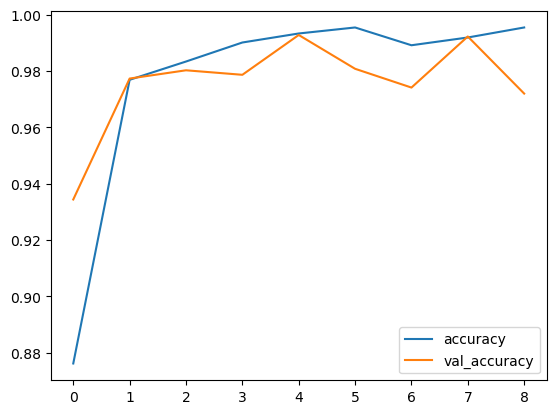

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


118/118 [==============================] - 5s 41ms/step - loss: 0.0900 - accuracy: 0.9720


In [8]:
test_acc

0.972000002861023

In [9]:

model.save("chinese_cnn")